1) What was the biggest bank at the end of 2009?

In [398]:
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import xlrd
import csv
## Converting to CSV for useful dataframe operations
def csv_from_excel():
    wb = xlrd.open_workbook('Bank failure data.xlsx')
    sheet = wb.sheet_by_name('Bank Data')
    your_csv_file = open('Bank failure data.csv', 'w')
    write = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sheet.nrows):
        write.writerow(sheet.row_values(rownum))
    your_csv_file.close()
csv_from_excel()
#sorting the values corresponding to 2009Q4
df = pd.read_csv('Bank failure data.csv')
df1=(df.loc[df['Quarter'] == '2009Q4'])
df1.loc[df1['Size'].idxmax()]


Bank Name                         Citibank (South Dakota), N.A.
Quarter                                                  2009Q4
Tier One                                                  12.78
Texas                                                      0.15
Size                                                    99.7772
Brokered Deposits                                         95.78
Net Chargeoffs                                             5.66
Constr and Land Dev Loans                                     0
Change in Portfolio Mix                                   25.28
NP CRE to Assets                                              0
Volatile Liabilities to Assets                            18.37
Securities                                               107.54
Failed during 2010Q2                                         No
Cert Number                                               23360
Name: 2618, dtype: object

2)What trends do you observe in net chargeoffs over time?

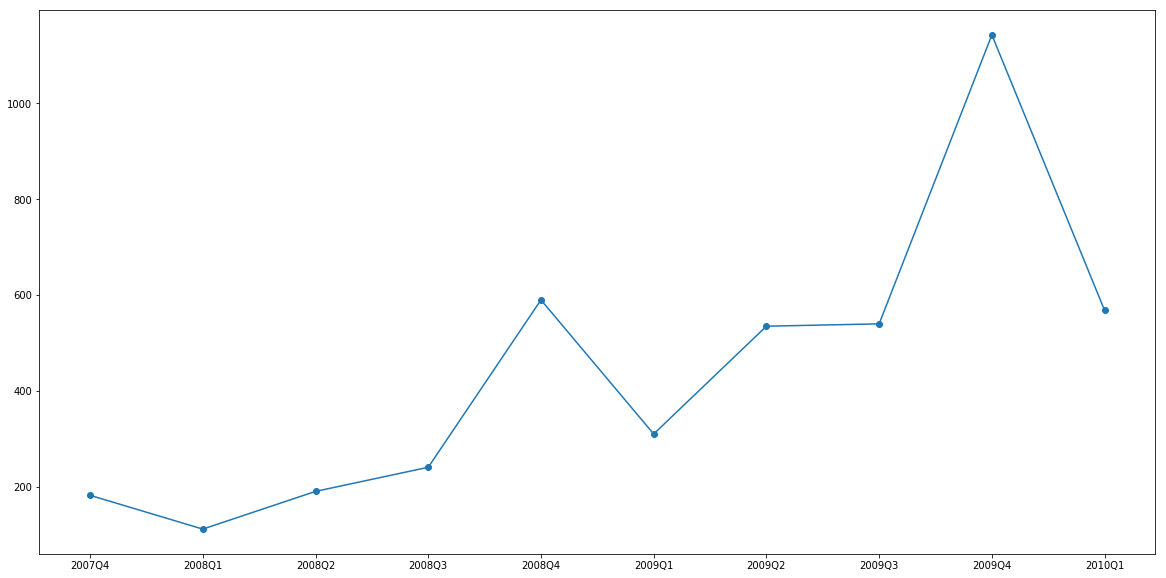

In [399]:
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('Bank failure data.xlsx')
    sheet = wb.sheet_by_name('Bank Data')
    your_csv_file = open('Bank failure data.csv', 'w')
    write = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)
    for rownum in range(sheet.nrows):
        write.writerow(sheet.row_values(rownum))
    your_csv_file.close()
csv_from_excel()
df = pd.read_csv('Bank failure data.csv')

#I have divided the data set into 10 data frames and have pulled the data for each quarter from each of them
df1=(df.loc[df['Quarter'] == '2007Q4'])
Total1 = df1['Net Chargeoffs'].sum()

df2=(df.loc[df['Quarter'] == '2008Q1'])
Total2 = df2['Net Chargeoffs'].sum()

df3=(df.loc[df['Quarter'] == '2008Q2'])
Total3 = df3['Net Chargeoffs'].sum()

df4=(df.loc[df['Quarter'] == '2008Q3'])
Total4 = df4['Net Chargeoffs'].sum()

df5=(df.loc[df['Quarter'] == '2008Q4'])
Total5 = df5['Net Chargeoffs'].sum()

df6=(df.loc[df['Quarter'] == '2009Q1'])
Total6 = df6['Net Chargeoffs'].sum()

df7=(df.loc[df['Quarter'] == '2009Q2'])
Total7 = df7['Net Chargeoffs'].sum()

df8=(df.loc[df['Quarter'] == '2009Q3'])
Total8 = df8['Net Chargeoffs'].sum()

df9=(df.loc[df['Quarter'] == '2009Q4'])
Total9 = df9['Net Chargeoffs'].sum()

df10=(df.loc[df['Quarter'] == '2010Q1'])
Total10 = df10['Net Chargeoffs'].sum()
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([Total1,Total2,Total3,Total4,Total5,Total6,Total7,Total8,Total9,Total10])
my_xticks = ['2007Q4','2008Q1','2008Q2','2008Q3','2008Q4','2009Q1','2009Q2','2009Q3','2009Q4','2010Q1']
plt.figure(figsize=(20,10))

plt.xticks(x, my_xticks)
plt.plot(x, y,'-o')


Answer:Based on the plot the net chargeoff is highest in the 2009Q4

3)Is there a correlation between level of profitability of a bank’s investments in
securities (here measured by fair value of investments over cost basis) and
bank failure?

In [400]:

df['Failed during 2010Q2'] = df['Failed during 2010Q2'].map({'Yes': 1, 'No': 0})
X = df['Securities'].values
Y = df['Failed during 2010Q2'].values


In [401]:
df['Securities'].corr(df['Failed during 2010Q2'])

-0.15422273780177614

Answer: Since the correlation coefficient is less than 0 but greater than -1,they are slightly correlated.

4) What are the top two predictors of bank failure?

In [402]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
df=df.dropna() #dropping the null values
df.isnull().sum()
df1=df
df1 = df1.drop('Failed during 2010Q2', 1)
X = df1.loc[:,'Tier One':'Securities']
Y = df['Failed during 2010Q2'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1, random_state=10) #performing logistic regression for testing predictors
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train.ravel())
Y_pred = LogReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_pred)
confusion_matrix
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       356
          1       0.86      0.45      0.59        42

avg / total       0.93      0.93      0.93       398



In [403]:
LogReg.coef_.T

array([[-0.14585152],
       [ 0.01128856],
       [-0.01059681],
       [ 0.03274923],
       [ 0.01184758],
       [ 0.08027861],
       [ 0.00554465],
       [ 0.21733606],
       [ 0.00535747],
       [-0.03765192]])

Answer: Based on the coefficients above the top two predictors are judged by the highest values.The best predictors are Constr and Land Dev Loans and NP CRE to Assets

5) Which banks will fail in the future?

In [404]:
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
#We use the look-forward way of forecasting where the value of the upcoming quarter is equal to the value of the previosu quarter
#Thus we will consider the predicted Y's for 2010 Q1 for predicting which banks will fail 
df1=df
df1 = df1.drop('Failed during 2010Q2', 1)
X = df1.loc[:,'Tier One':'Securities']
Y = df['Failed during 2010Q2']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .1, random_state=10)
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train.ravel())
Y_pred = LogReg.predict(X)
Y_new=Y_pred[11::10]
banks=df['Bank Name'].unique()
Y_new=Y_new[0:394].copy()
bank_list = pd.DataFrame(
    {'Bank': banks,
     'Survival Result': Y_new
    })

print(bank_list)


                                           Bank  Survival Result
0                                 Exchange Bank                0
1             Peoples Bank, Biloxi, Mississippi                0
2                                  Bank of Vici                0
3                      Adirondack Trust Company                0
4                      Wilmington Trust Company                0
5               Community Bank of Shelby County                0
6                           Moorhead State Bank                0
7                    M&I Marshall & Ilsley Bank                0
8                           Midland States Bank                0
9                            Wood & Huston Bank                0
10                     Southern Commercial Bank                0
11              Peoples State Bank of Plainview                0
12               Feliciana Bank & Trust Company                0
13           Farmers & Merchants Bank Dyer Tenn                0
14                       